# Assignment 2

Before working on this assignment please read these instructions fully. In the submission area, you will notice that you can click the link to **Preview the Grading** for each step of the assignment. This is the criteria that will be used for peer grading. Please familiarize yourself with the criteria before beginning the assignment.

An NOAA dataset has been stored in the file `data/C2A2_data/BinnedCsvs_d400/fb441e62df2d58994928907a91895ec62c2c42e6cd075c2700843b89.csv`. This is the dataset to use for this assignment. Note: The data for this assignment comes from a subset of The National Centers for Environmental Information (NCEI) [Daily Global Historical Climatology Network](https://www1.ncdc.noaa.gov/pub/data/ghcn/daily/readme.txt) (GHCN-Daily). The GHCN-Daily is comprised of daily climate records from thousands of land surface stations across the globe.

Each row in the assignment datafile corresponds to a single observation.

The following variables are provided to you:

* **id** : station identification code
* **date** : date in YYYY-MM-DD format (e.g. 2012-01-24 = January 24, 2012)
* **element** : indicator of element type
    * TMAX : Maximum temperature (tenths of degrees C)
    * TMIN : Minimum temperature (tenths of degrees C)
* **value** : data value for element (tenths of degrees C)

For this assignment, you must:

1. Read the documentation and familiarize yourself with the dataset, then write some python code which returns a line graph of the record high and record low temperatures by day of the year over the period 2005-2014. The area between the record high and record low temperatures for each day should be shaded.
2. Overlay a scatter of the 2015 data for any points (highs and lows) for which the ten year record (2005-2014) record high or record low was broken in 2015.
3. Watch out for leap days (i.e. February 29th), it is reasonable to remove these points from the dataset for the purpose of this visualization.
4. Make the visual nice! Leverage principles from the first module in this course when developing your solution. Consider issues such as legends, labels, and chart junk.

The data you have been given is near **Ann Arbor, Michigan, United States**, and the stations the data comes from are shown on the map below.

In [21]:
# import matplotlib.pyplot as plt
# import mplleaflet
# import pandas as pd

# def leaflet_plot_stations(binsize, hashid):

#     df = pd.read_csv('data/C2A2_data/BinSize_d{}.csv'.format(binsize))

#     station_locations_by_hash = df[df['hash'] == hashid]

#     lons = station_locations_by_hash['LONGITUDE'].tolist()
#     lats = station_locations_by_hash['LATITUDE'].tolist()

#     plt.figure(figsize=(8,8))

#     plt.scatter(lons, lats, c='r', alpha=0.7, s=200)

#     return mplleaflet.display()

# leaflet_plot_stations(400,'fb441e62df2d58994928907a91895ec62c2c42e6cd075c2700843b89')

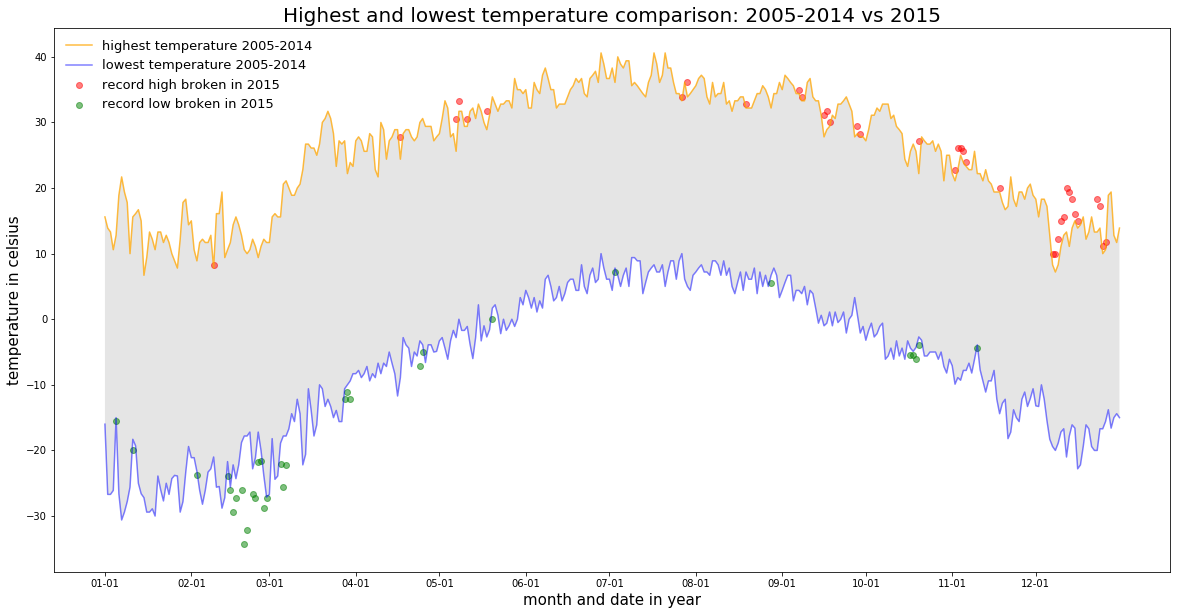

In [7]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

df = pd.read_csv('fb441e62df2d58994928907a91895ec62c2c42e6cd075c2700843b89.csv')

df.sort_values(by = 'Date', inplace = True)  # sort the data by date
df_05To14 = df.loc[df['Date'] <= '2014-12-31'] # slice out the dataset for 2005-2014
df_15 = df.loc[df['Date'] > '2014-12-31'] # slice out the dataset for 2015


df_05To14Max = df_05To14.loc[df_05To14['Element'] == 'TMAX']  #get only max temperatures 
df_05To14Max = df_05To14Max.groupby(['Date'])['Data_Value'].max() # group by dates and calculate the largest value of each date
df_05To14Max = df_05To14Max.loc[~df_05To14Max.index.str.endswith('02-29')] # exclude leap days 
df_05To14Max.index = df_05To14Max.index.str[5:] # remove all the year strings
df_05To14Max = df_05To14Max.groupby(['Date']).agg(['max']) # group by date and calculate the max temp for each date, 
                                                        # this is the final dataset for the max daily temperatures through out the ten year

    
df_05To14Min = df_05To14.loc[df_05To14['Element'] == 'TMIN']  
df_05To14Min = df_05To14Min.groupby('Date')['Data_Value'].min()
df_05To14Min = df_05To14Min.loc[~df_05To14Min.index.str.endswith('02-29')]
df_05To14Min.index = df_05To14Min.index.str[5:]
df_05To14Min = df_05To14Min.groupby('Date').agg(['min'])  # this is the final dataset for the min daily temperatures through out the ten years

# merge max dataset and min dataset together into one dataset, we now have a max and min daily temp through out the 10 years 
df_05To14MaxMin = pd.merge(df_05To14Max, df_05To14Min, how = 'inner', left_index = True, right_index = True)

df_15Max = df_15.loc[df_15['Element'] == 'TMAX']
df_15Max = df_15Max.groupby('Date')['Data_Value'].agg(['max'])
df_15Max.index = df_15Max.index.str[5:]   # this is the final dataset for the max daily temperatures in 2015

df_15Min = df_15.loc[df_15['Element'] == 'TMIN']
df_15Min = df_15Min.groupby('Date')['Data_Value'].agg(['min'])
df_15Min.index = df_15Min.index.str[5:]   # this is the final dataset for the min daily temperatures in 2015

df_15MaxMin = pd.merge(df_15Max, df_15Min, how = 'inner', left_index = True, right_index = True)  # dataset of max and min daily temp in 2015


df_15MaxMin.rename(columns = {'max': '2015max', 'min': '2015min'}, inplace = True)
df_05To14MaxMin.rename(columns = {'max': '2005-14max', 'min': '2005-14min'}, inplace = True )

df = pd.merge(df_05To14MaxMin, df_15MaxMin, how = 'inner', left_index = True, right_index = True) # merge all data into one df

df = df*0.1  # convert all value to celsius

maxRecordBroken = df.loc[df['2015max'] > df['2005-14max']].iloc[:,[0,2]]  # dataset where max historical record was broken in 2015
minRecordBroken = df.loc[df['2015min'] < df['2005-14min']].iloc[:,[1,3]]  # dataset where min historical record was broken in 2015


# plotting 
plt.figure(figsize = (20,10))

plt.plot(df.index, df['2005-14max'], '-', alpha = 0.75, label = 'highest temperature 2005-2014', color = 'orange')
plt.plot(df.index, df['2005-14min'], '-', alpha = 0.5, label = 'lowest temperature 2005-2014', color = 'blue')
plt.fill_between(range(len(df.index)), 
                     df['2005-14max'], df['2005-14min'], 
                     facecolor = 'grey', alpha = 0.2)


plt.scatter(maxRecordBroken.index, maxRecordBroken['2015max'], color = 'red', alpha = 0.5, label = 'record high broken in 2015')
plt.scatter(minRecordBroken.index, minRecordBroken['2015min'], color = 'green', alpha = 0.5, label = 'record low broken in 2015')

plt.legend(loc = 'upper left', fontsize = 13, frameon = False)
plt.ylabel('temperature in celsius', fontsize = 15)
plt.xlabel('month and date in year', fontsize = 15)
plt.title('Highest and lowest temperature comparison: 2005-2014 vs 2015', fontsize = 20)

x = plt.gca().xaxis   # get the x axis
x.set_ticks([i for i in df.index.values if i[-2:] == '01'])  #set the ticks in x asis
        
    
# plt.savefig('temperature pattern in Ann Arbor, Michigan.png')
plt.show()


